# Data Analyst Test

* Nama : Alif Gala Buana
* Posisi yang dilamar : Jr.Data Analyst


# Data Dictionary

**Table: gamesession**

gamesession table represents the stream or video of Eklipse users. The
stream/video/gamesession will only be processed if the user submits it.
* id: gamesession primary key
* user_id: the user owns/has the gamesession
* duration: duration of the gamesession
* submited_date: timestamp when the gamesession is submitted by the user
* created_at: timestamp when we receive the gamesession (we crawl their
streams periodically)
* game_name: name of the game model we used to process the gamesession
(can be assumed as the game played)
* join_at: the user registration timestamp

**Table: clips**

clips table represents the clips generated either from our AI or edited clips.
* id: the primary key of the clips table
* user_id: the user owning the clips
* gamesession_Id: the gamesession (or video) source of the clips. If the clips
are generated by Eklipse AI, it will have the gamesession_id
* clip_type_id: the type of the clips
    * 1: horizontal AI highlight clips
    * 2: converted to TikTok clips
    * 3: trimmed clips
    * 5: eventful highlight clips based on stream statistic
    * 6: weekly montage clips created via playlist feature
    * 7: clips uploaded from the local
    * 8: vertical clips from Youtube Highlight
* event_name: the name of the event or moment of the clips
* game_name: name of the game model used
* duration: duration of the clips in seconds
* created_at: timestamp of when the clip was created
* join_at: the user registration timestamp

**Table: downloaded_clips**

downloaded_clips table represents the clips downloaded by the user.
* id: the primary key of the table
* user_Id: the user does the action
* clip_id: id of the downloaded clip
* gamesession_Id: the gamesession (or video) source of the clips. If the clips
are generated by Eklipse AI, it will have the gamesession_id
* created_at: the timestamp of the download
* join_at: the user registration timestamp

**Table: shared_clips**

shared_clips table represents the clips shared (or scheduled to be shared) by the
user.
* user_id: the user does the action
* clip_id: id of the shared clips
* gamesession_Id: the gamesession (or video) source of the clips. If the clips
are generated by Eklipse AI, it will have the gamesession_id
* created_at: the timestamp when creating the schedule to share
*  scheduled_at: timestamp when the clips will be shared
* join_at: the user registration timestamp

**Table: premium**

premium table represents the premium subscription applied to the users.
* user_id: the user ID that becomes premium
* starts_at: start of the premium plan
* ends_at: end of the premium plan
* created_at: the timestamp when the record is created
* updated_at: timestamp if any data in this record (row) is edited
* canceled_at: timestamp when the user cancels their premium subscription
* deleted_at: timestamp when the premium plan expired
* join_at: the user registration timestamp

# Data Initial

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset


In [2]:
gamesessions = pd.read_csv("gamesession.csv")
clips = pd.read_csv("clips.csv")
downloaded_clips = pd.read_csv("downloaded_clips.csv")
shared_clips = pd.read_csv("shared_clips.csv")
premium = pd.read_csv("premium_users.csv")

# Data Cleaning & Preprocessing

## Clips Dataset

In [3]:
clips.head()

,Unnamed: 0,id,user_id,gamesession_Id,clip_type_id,duration,event_name,game_name,created_at,join_at
0,0,1.344700e+11,3133221,103039886.0,5,60,High Comment,Other Games,6/1/2023 12:00,3/9/2023 15:16
1,1,1.344700e+11,3133221,103039886.0,5,60,High Comment,Other Games,6/1/2023 12:00,3/9/2023 15:16
2,2,1.344710e+11,3934931,100738061.0,2,10,NaN,Overwatch 2,6/1/2023 12:01,4/12/2023 23:27
3,3,1.344710e+11,5090722,103014694.0,1,14,Single kill,COD: Warzone3-2 & MW3-2,6/1/2023 12:01,5/14/2023 18:26
4,4,1.344710e+11,5090722,103014694.0,1,14,Single kill,COD: Warzone3-2 & MW3-2,6/1/2023 12:02,5/14/2023 18:26


In [4]:
clips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552031 entries, 0 to 552030
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      552031 non-null  int64  
 1   id              552031 non-null  float64
 2   user_id         552031 non-null  int64  
 3   gamesession_Id  539270 non-null  float64
 4   clip_type_id    552031 non-null  int64  
 5   duration        552031 non-null  int64  
 6   event_name      530307 non-null  object 
 7   game_name       539270 non-null  object 
 8   created_at      552031 non-null  object 
 9   join_at         552031 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 42.1+ MB


In [5]:
null_clips = clips.isnull().sum().reset_index()
null_clips.columns = ['Column', 'Missing Value']
null_clips['Missing Value (%)'] = null_clips['Missing Value'] / len(clips) * 100
null_clips

,Column,Missing Value,Missing Value (%)
0,Unnamed: 0,0,0.000000
1,id,0,0.000000
2,user_id,0,0.000000
3,gamesession_Id,12761,2.311646
4,clip_type_id,0,0.000000
5,duration,0,0.000000
6,event_name,21724,3.935286
7,game_name,12761,2.311646
8,created_at,0,0.000000
9,join_at,0,0.000000


In [6]:
clips.dropna(inplace=True)

In [7]:
clips['created_at'] = pd.to_datetime(clips['created_at'])
clips['join_at'] = pd.to_datetime(clips['join_at'])

In [8]:
clips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530307 entries, 0 to 552030
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Unnamed: 0      530307 non-null  int64         
 1   id              530307 non-null  float64       
 2   user_id         530307 non-null  int64         
 3   gamesession_Id  530307 non-null  float64       
 4   clip_type_id    530307 non-null  int64         
 5   duration        530307 non-null  int64         
 6   event_name      530307 non-null  object        
 7   game_name       530307 non-null  object        
 8   created_at      530307 non-null  datetime64[ns]
 9   join_at         530307 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(4), object(2)
memory usage: 44.5+ MB


In [9]:
clips.duplicated().sum()

0

## downloaded_clips Dataset

In [10]:
downloaded_clips.head(10)

,Unnamed: 0,id,user_Id,clip_id,gamesession_Id,game_name,event_name,created_at,join_at
0,0,556784158,3934931.0,134463515475,100738061.0,Overwatch 2,NaN,2023-06-01 12:20:56,2023-04-12 23:27:14
1,1,556784256,3934931.0,134464540455,100738061.0,Overwatch 2,NaN,2023-06-01 12:20:57,2023-04-12 23:27:14
2,2,556784354,3934931.0,134466310875,100738061.0,Overwatch 2,NaN,2023-06-01 12:21:00,2023-04-12 23:27:14
3,3,556784452,3934931.0,134468205535,100738061.0,Overwatch 2,NaN,2023-06-01 12:21:00,2023-04-12 23:27:14
4,4,556784550,3934931.0,134469370285,100738061.0,Overwatch 2,NaN,2023-06-01 12:21:01,2023-04-12 23:27:14
5,5,556784648,3934931.0,134470573860,100738061.0,Overwatch 2,NaN,2023-06-01 12:21:02,2023-04-12 23:27:14
6,6,556784746,3934931.0,134472515110,100738061.0,Overwatch 2,NaN,2023-06-01 12:21:04,2023-04-12 23:27:14
7,7,556786804,2447627.0,134317331585,102723200.0,Other Games,Moment,2023-06-01 12:26:56,2023-01-22 14:04:23
8,8,556792194,3934931.0,134482493135,101179626.0,Overwatch 2,NaN,2023-06-01 13:03:22,2023-04-12 23:27:14
9,9,556792292,3934931.0,134487416145,101179626.0,Overwatch 2,NaN,2023-06-01 13:03:24,2023-04-12 23:27:14


In [11]:
downloaded_clips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12938 entries, 0 to 12937
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      12938 non-null  int64  
 1   id              12938 non-null  int64  
 2   user_Id         12938 non-null  float64
 3   clip_id         12938 non-null  int64  
 4   gamesession_Id  12938 non-null  float64
 5   game_name       12938 non-null  object 
 6   event_name      8919 non-null   object 
 7   created_at      12938 non-null  object 
 8   join_at         12938 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 909.8+ KB


In [12]:
null_clips = downloaded_clips.isnull().sum().reset_index()
null_clips.columns = ['Column', 'Missing Value']
null_clips['Missing Value (%)'] = null_clips['Missing Value'] / len(downloaded_clips) * 100
null_clips

,Column,Missing Value,Missing Value (%)
0,Unnamed: 0,0,0.000000
1,id,0,0.000000
2,user_Id,0,0.000000
3,clip_id,0,0.000000
4,gamesession_Id,0,0.000000
5,game_name,0,0.000000
6,event_name,4019,31.063534
7,created_at,0,0.000000
8,join_at,0,0.000000


In [13]:
downloaded_clips['event_name'].unique()

array([nan, 'Moment', 'Kills', 'Single kill', 'Multi kill', 'Double kill',
       'Champion', 'Best k minutes', 'Killstreak', 'Multi-kill',
       'Raid Boss', 'Round', 'Double-elimination', 'Best round',
       'AI nomination', 'Victory', 'Team wiped', 'Oneshot Compilation',
       'Clutch', 'Kill, down', 'Triple kill', 'Victory ending',
       'Chain kill', 'Team Ace', 'Single Kill', 'Multi Kill', 'boss-kill',
       'death', 'Goal', 'Ending moments', 'Knock down', 'hook', 'Escaped',
       'combo streak left', 'victory', 'High Viewer', 'kill', 'Gulag',
       'High Comment', 'Chase', 'Quadra kill', 'touchdown',
       'excellent-shot', 'elimination', 'Penta kill', 'Kill',
       'multi-kill-knock', 'kill-knock', 'emotional-moment', 'scored',
       'fail moment', 'eliminated', 'win', 'finish', 'Assist', 'knock',
       'assist', 'made-shot', 'stun', 'voice-command', 'overtake',
       'highlights', 'Kill-Knock', 'Kill streak', 'All highlights',
       'Top round', 'easy fight', 'wid

In [14]:
downloaded_clips['event_name'] = downloaded_clips['event_name'].fillna('Unknown')

In [15]:
downloaded_clips['created_at'] = pd.to_datetime(downloaded_clips['created_at'])
downloaded_clips['join_at'] = pd.to_datetime(downloaded_clips['join_at'])

In [16]:
downloaded_clips.duplicated().sum()

0

## shared_clips Dataset

In [17]:
shared_clips.head()

,Unnamed: 0,user_id,clip_id,gamesession_Id,game_name,event_name,created_at,scheduled_at,join_at
0,0,5388565,134463197110,101121252.0,Apex Legends,NaN,2023-06-01 17:26:19,2023-06-01 22:30:00,2023-05-27 22:47:48
1,1,5388565,134463197110,101121252.0,Apex Legends,NaN,2023-06-01 17:27:11,2023-06-01 22:30:00,2023-05-27 22:47:48
2,2,4481295,133758065225,101171965.0,Other Games,NaN,2023-06-01 19:50:27,2023-06-01 19:50:27,2023-04-28 12:32:25
3,3,4481295,133758065225,101171965.0,Other Games,NaN,2023-06-01 19:50:28,2023-06-01 19:50:28,2023-04-28 12:32:25
4,4,4481295,133924026570,101171965.0,Other Games,NaN,2023-06-01 19:51:36,2023-06-01 19:51:36,2023-04-28 12:32:25


In [18]:
shared_clips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5798 entries, 0 to 5797
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5798 non-null   int64  
 1   user_id         5798 non-null   int64  
 2   clip_id         5798 non-null   int64  
 3   gamesession_Id  5798 non-null   float64
 4   game_name       5798 non-null   object 
 5   event_name      761 non-null    object 
 6   created_at      5798 non-null   object 
 7   scheduled_at    5798 non-null   object 
 8   join_at         5798 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 407.8+ KB


In [19]:
null_clips = shared_clips.isnull().sum().reset_index()
null_clips.columns = ['Column', 'Missing Value']
null_clips['Missing Value (%)'] = null_clips['Missing Value'] / len(shared_clips) * 100
null_clips

,Column,Missing Value,Missing Value (%)
0,Unnamed: 0,0,0.000000
1,user_id,0,0.000000
2,clip_id,0,0.000000
3,gamesession_Id,0,0.000000
4,game_name,0,0.000000
5,event_name,5037,86.874784
6,created_at,0,0.000000
7,scheduled_at,0,0.000000
8,join_at,0,0.000000


In [20]:
shared_clips['event_name'] = shared_clips['event_name'].fillna('Unknown')

In [21]:
shared_clips['created_at'] = pd.to_datetime(shared_clips['created_at'])
shared_clips['join_at'] = pd.to_datetime(shared_clips['join_at'])
shared_clips['scheduled_at'] = pd.to_datetime(shared_clips['scheduled_at'])

In [22]:
shared_clips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5798 entries, 0 to 5797
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      5798 non-null   int64         
 1   user_id         5798 non-null   int64         
 2   clip_id         5798 non-null   int64         
 3   gamesession_Id  5798 non-null   float64       
 4   game_name       5798 non-null   object        
 5   event_name      5798 non-null   object        
 6   created_at      5798 non-null   datetime64[ns]
 7   scheduled_at    5798 non-null   datetime64[ns]
 8   join_at         5798 non-null   datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(3), object(2)
memory usage: 407.8+ KB


In [23]:
shared_clips.duplicated().sum()

0

## Gamesession Dataset

In [24]:
gamesessions.head()

,Unnamed: 0,id,user_id,duration,submited_date,created_at,game_name,join_at
0,0,96886552,4235049,15369000,2023-06-01 18:06:00,2023-05-19 06:36:39,Other Games,2023-04-26 13:59:30
1,1,97882905,5240417,10292000,2023-06-05 05:09:28,2023-05-21 09:49:01,League of Legends,2023-05-20 21:48:57
2,2,98018265,4646005,11378000,2023-06-02 13:43:37,2023-05-21 14:56:00,Other Games,2023-04-30 20:27:40
3,3,98339228,5266534,11858000,2023-06-04 16:30:52,2023-05-22 10:20:35,Other Games,2023-05-21 22:20:31
4,4,98382750,3313765,15729000,2023-06-04 09:27:22,2023-05-22 11:56:36,Halo Infinite,2023-03-18 15:27:07


In [25]:
gamesessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37579 entries, 0 to 37578
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     37579 non-null  int64 
 1   id             37579 non-null  int64 
 2   user_id        37579 non-null  int64 
 3   duration       37579 non-null  int64 
 4   submited_date  37579 non-null  object
 5   created_at     37579 non-null  object
 6   game_name      37550 non-null  object
 7   join_at        37579 non-null  object
dtypes: int64(4), object(4)
memory usage: 2.3+ MB


In [26]:
null_clips = gamesessions.isnull().sum().reset_index()
null_clips.columns = ['Column', 'Missing Value']
null_clips['Missing Value (%)'] = null_clips['Missing Value'] / len(gamesessions) * 100
null_clips

,Column,Missing Value,Missing Value (%)
0,Unnamed: 0,0,0.000000
1,id,0,0.000000
2,user_id,0,0.000000
3,duration,0,0.000000
4,submited_date,0,0.000000
5,created_at,0,0.000000
6,game_name,29,0.077171
7,join_at,0,0.000000


In [27]:
gamesessions.dropna(inplace=True)

In [28]:
gamesessions['created_at'] = pd.to_datetime(gamesessions['created_at'])
gamesessions['join_at'] = pd.to_datetime(gamesessions['join_at'])
gamesessions['submited_date'] = pd.to_datetime(gamesessions['submited_date'])

In [29]:
gamesessions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37550 entries, 0 to 37578
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     37550 non-null  int64         
 1   id             37550 non-null  int64         
 2   user_id        37550 non-null  int64         
 3   duration       37550 non-null  int64         
 4   submited_date  37550 non-null  datetime64[ns]
 5   created_at     37550 non-null  datetime64[ns]
 6   game_name      37550 non-null  object        
 7   join_at        37550 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(4), object(1)
memory usage: 2.6+ MB


In [30]:
gamesessions.duplicated().sum()

0

## premium_users Dataset

In [31]:
premium.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   384 non-null    int64 
 1   user_id      384 non-null    int64 
 2   starts_at    384 non-null    object
 3   ends_at      384 non-null    object
 4   created_at   384 non-null    object
 5   updated_at   384 non-null    object
 6   canceled_at  125 non-null    object
 7   join_at      384 non-null    object
dtypes: int64(2), object(6)
memory usage: 24.1+ KB


In [32]:
premium.head()

,Unnamed: 0,user_id,starts_at,ends_at,created_at,updated_at,canceled_at,join_at
0,0,2203292,2023-01-02,2023-03-03,2023-01-03 02:12:37,2023-03-04 00:00:18,2023-02-09,2023-01-02 13:17:05
1,1,2212210,2023-01-04,2023-02-04,2023-01-04 07:02:52,2023-02-05 00:00:16,2023-01-09,2023-01-03 18:14:44
2,2,2256527,2023-01-10,2023-05-11,2023-01-11 03:11:23,2023-05-12 00:00:07,NaN,2023-01-10 14:59:51
3,3,2293382,2023-01-15,2023-02-15,2023-01-15 12:46:50,2023-02-16 00:00:17,2023-01-15,2023-01-15 00:40:02
4,4,2402582,2023-01-19,2023-12-20,2023-01-20 01:20:09,2023-11-21 00:00:11,NaN,2023-01-19 13:18:36


In [33]:
null_clips = premium.isnull().sum().reset_index()
null_clips.columns = ['Column', 'Missing Value']
null_clips['Missing Value (%)'] = null_clips['Missing Value'] / len(premium) * 100
null_clips

,Column,Missing Value,Missing Value (%)
0,Unnamed: 0,0,0.000000
1,user_id,0,0.000000
2,starts_at,0,0.000000
3,ends_at,0,0.000000
4,created_at,0,0.000000
5,updated_at,0,0.000000
6,canceled_at,259,67.447917
7,join_at,0,0.000000


In [34]:
premium = premium.drop(columns=['canceled_at'])

In [35]:
premium.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  384 non-null    int64 
 1   user_id     384 non-null    int64 
 2   starts_at   384 non-null    object
 3   ends_at     384 non-null    object
 4   created_at  384 non-null    object
 5   updated_at  384 non-null    object
 6   join_at     384 non-null    object
dtypes: int64(2), object(5)
memory usage: 21.1+ KB


In [36]:
premium['created_at'] = pd.to_datetime(premium['created_at'])
premium['join_at'] = pd.to_datetime(premium['join_at'])
premium['starts_at'] = pd.to_datetime(premium['starts_at'])
premium['updated_at'] = pd.to_datetime(premium['updated_at'])
premium['ends_at'] = pd.to_datetime(premium['ends_at'])

In [37]:
premium.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  384 non-null    int64         
 1   user_id     384 non-null    int64         
 2   starts_at   384 non-null    datetime64[ns]
 3   ends_at     384 non-null    datetime64[ns]
 4   created_at  384 non-null    datetime64[ns]
 5   updated_at  384 non-null    datetime64[ns]
 6   join_at     384 non-null    datetime64[ns]
dtypes: datetime64[ns](5), int64(2)
memory usage: 21.1 KB


In [38]:
premium.duplicated().sum()

0

# Eksploratory Data Analysis

## Identify Free and Premium Users

In [39]:
premium_user_ids = premium['user_id'].unique()
free_user_ids = gamesessions[~gamesessions['user_id'].isin(premium_user_ids)]['user_id'].unique()


## Data Analysis : the behavioral differences between Free users and Premium users

In [40]:
premium_gamesessions = gamesessions[gamesessions['user_id'].isin(premium_user_ids)]
free_gamesessions = gamesessions[gamesessions['user_id'].isin(free_user_ids)]

premium_gamesessions_count = premium_gamesessions.groupby('user_id').size()
free_gamesessions_count = free_gamesessions.groupby('user_id').size()

### Gamesessions Analysis

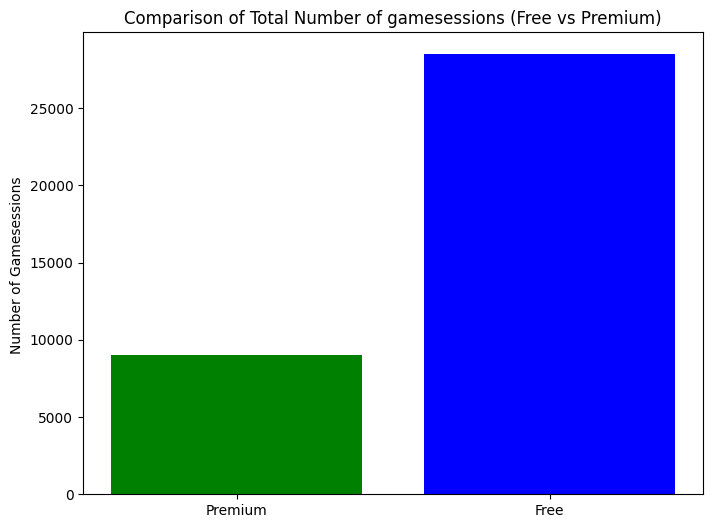

In [41]:
# Menentukan jumlah pengguna berdasarkan gamesessions
premium_user_count = premium_gamesessions_count.sum()
free_user_count = free_gamesessions_count.sum()

# Visualisasi perbandingan jumlah pengguna
plt.figure(figsize=(8, 6))
plt.bar(['Premium', 'Free'], [premium_user_count, free_user_count], color=['green', 'blue'])
plt.title('Comparison of Total Number of gamesessions (Free vs Premium)')
plt.ylabel('Number of Gamesessions ')
plt.show()


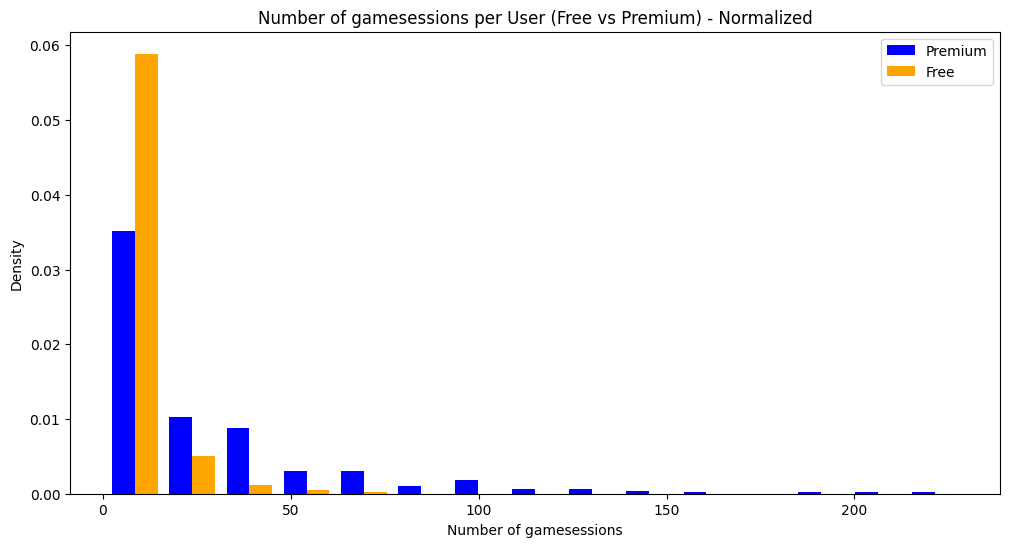

In [42]:
plt.figure(figsize=(12, 6))
plt.hist([premium_gamesessions_count, free_gamesessions_count], bins=15, label=['Premium', 'Free'], color=['blue', 'orange'], density=True)
plt.title('Number of gamesessions per User (Free vs Premium) - Normalized')
plt.xlabel('Number of gamesessions')
plt.ylabel('Density')
plt.legend()
plt.show()


In [43]:
premium_gamesessions = gamesessions[gamesessions['user_id'].isin(premium_user_ids)]
free_gamesessions = gamesessions[gamesessions['user_id'].isin(free_user_ids)]

premium_gamesessions_count = premium_gamesessions.groupby('user_id').size()
free_gamesessions_count = free_gamesessions.groupby('user_id').size()

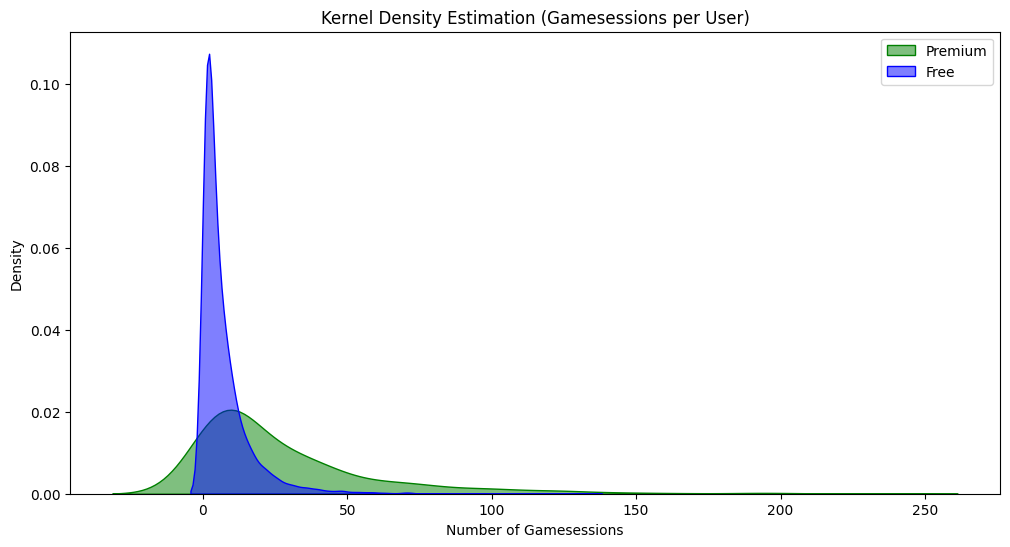

In [44]:
 plt.figure(figsize=(12, 6))
sns.kdeplot(premium_gamesessions_count, label='Premium', color='green', fill=True, alpha=0.5)
sns.kdeplot(free_gamesessions_count, label='Free', color='blue', fill=True, alpha=0.5)
plt.title('Kernel Density Estimation (Gamesessions per User)')
plt.xlabel('Number of Gamesessions')
plt.ylabel('Density')
plt.legend()
plt.show()


<ipython-input-45-e04c786d064b>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([premium_gamesessions_count, free_gamesessions_count], labels=['Premium', 'Free'], patch_artist=True,


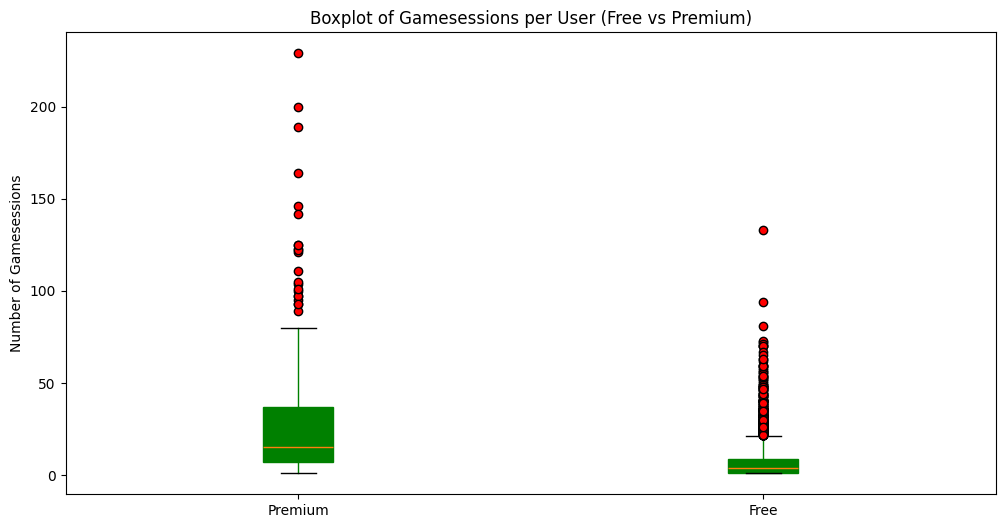

In [45]:
plt.figure(figsize=(12, 6))
plt.boxplot([premium_gamesessions_count, free_gamesessions_count], labels=['Premium', 'Free'], patch_artist=True,
            boxprops=dict(facecolor='green', color='green'),
            whiskerprops=dict(color='green'),
            flierprops=dict(markerfacecolor='red', marker='o'))
plt.title('Boxplot of Gamesessions per User (Free vs Premium)')
plt.ylabel('Number of Gamesessions')
plt.show()


### Clips Analysis

In [46]:
premium_clips = clips[clips['user_id'].isin(premium_user_ids)]
free_clips = clips[clips['user_id'].isin(free_user_ids)]

premium_clips_count = premium_clips.groupby('user_id').size()
free_clips_count = free_clips.groupby('user_id').size()

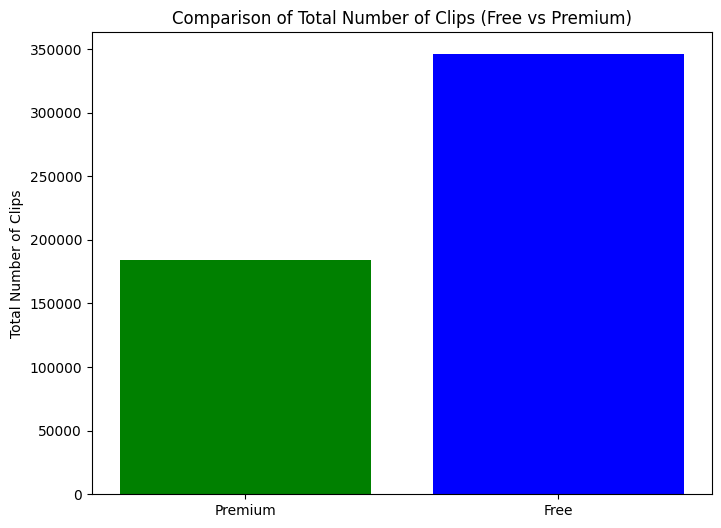

In [47]:
# Menghitung jumlah total clips per pengguna
premium_clips_total = premium_clips_count.sum()
free_clips_total = free_clips_count.sum()

# Visualisasi perbandingan jumlah clips total per kategori pengguna
plt.figure(figsize=(8, 6))
plt.bar(['Premium', 'Free'], [premium_clips_total, free_clips_total], color=['green', 'blue'])
plt.title('Comparison of Total Number of Clips (Free vs Premium)')
plt.ylabel('Total Number of Clips')
plt.show()


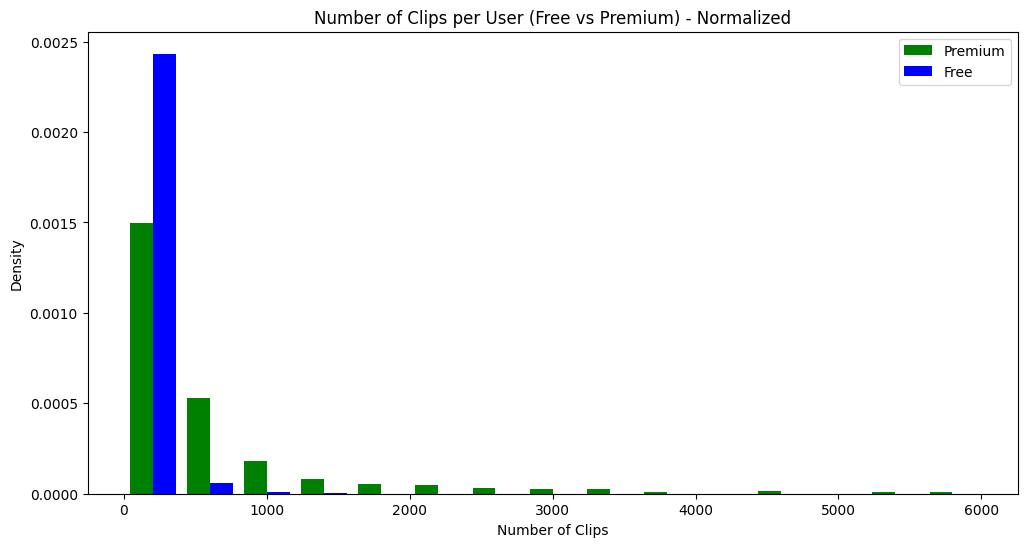

In [48]:
plt.figure(figsize=(12, 6))
plt.hist([premium_clips_count, free_clips_count], bins=15, label=['Premium', 'Free'], color=['green', 'blue'], density=True)
plt.title('Number of Clips per User (Free vs Premium) - Normalized')
plt.xlabel('Number of Clips')
plt.ylabel('Density')
plt.legend()
plt.show()


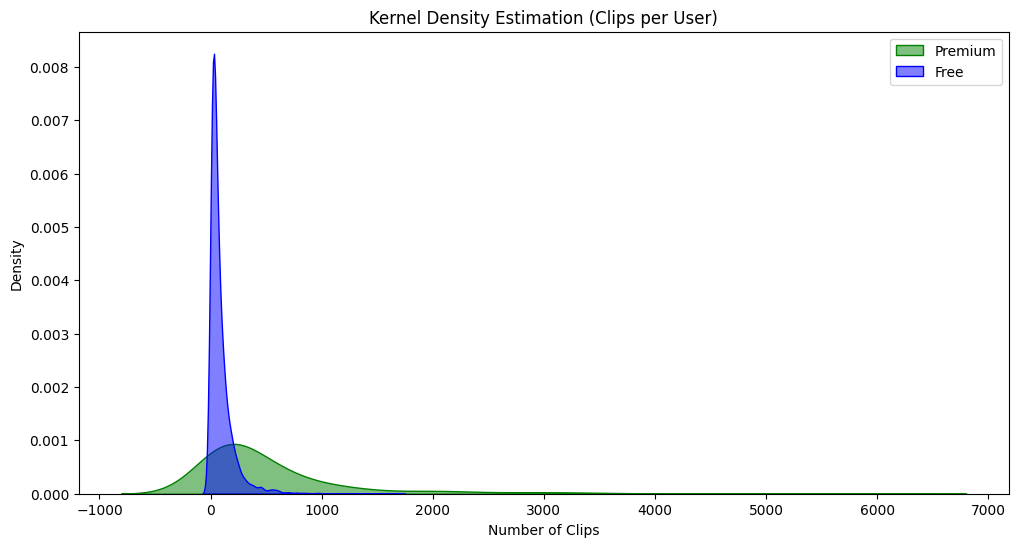

In [49]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.kdeplot(premium_clips_count, label='Premium', color='green', fill=True, alpha=0.5)
sns.kdeplot(free_clips_count, label='Free', color='blue', fill=True, alpha=0.5)
plt.title('Kernel Density Estimation (Clips per User)')
plt.xlabel('Number of Clips')
plt.ylabel('Density')
plt.legend()
plt.show()


<ipython-input-50-e66574f719e3>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([premium_clips_count, free_clips_count], labels=['Premium', 'Free'], patch_artist=True,


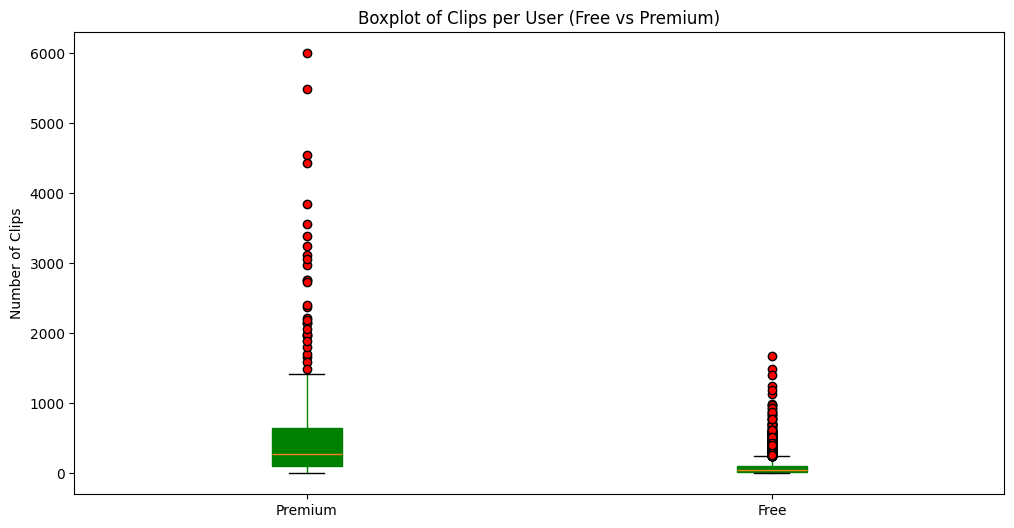

In [50]:
plt.figure(figsize=(12, 6))
plt.boxplot([premium_clips_count, free_clips_count], labels=['Premium', 'Free'], patch_artist=True,
            boxprops=dict(facecolor='green', color='green'),
            whiskerprops=dict(color='green'),
            flierprops=dict(markerfacecolor='red', marker='o'))
plt.title('Boxplot of Clips per User (Free vs Premium)')
plt.ylabel('Number of Clips')
plt.show()


### Downloaded and Share Analysis

In [51]:
downloads_count = downloaded_clips.groupby('user_Id').size()
shares_count = shared_clips.groupby('user_id').size()

In [52]:
premium_downloads = downloads_count[downloads_count.index.isin(premium_user_ids)]
free_downloads = downloads_count[downloads_count.index.isin(free_user_ids)]
premium_shares = shares_count[shares_count.index.isin(premium_user_ids)]
free_shares = shares_count[shares_count.index.isin(free_user_ids)]

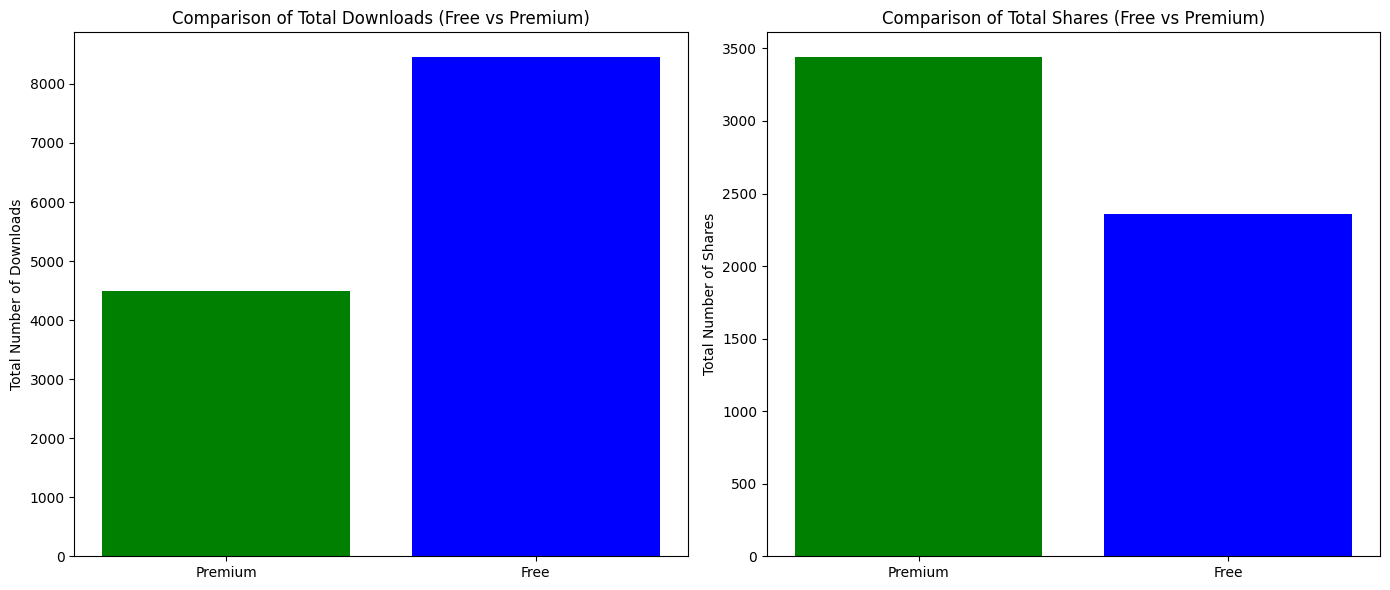

In [53]:
# Menghitung total Downloads dan Shares untuk Premium dan Free
premium_downloads_total = premium_downloads.sum()
free_downloads_total = free_downloads.sum()

premium_shares_total = premium_shares.sum()
free_shares_total = free_shares.sum()

# Visualisasi perbandingan jumlah Downloads dan Shares dengan subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot perbandingan Downloads
axes[0].bar(['Premium', 'Free'], [premium_downloads_total, free_downloads_total], color=['green', 'blue'])
axes[0].set_title('Comparison of Total Downloads (Free vs Premium)')
axes[0].set_ylabel('Total Number of Downloads')

# Plot perbandingan Shares
axes[1].bar(['Premium', 'Free'], [premium_shares_total, free_shares_total], color=['green', 'blue'])
axes[1].set_title('Comparison of Total Shares (Free vs Premium)')
axes[1].set_ylabel('Total Number of Shares')

# Menyusun layout dengan rapat
plt.tight_layout()
plt.show()


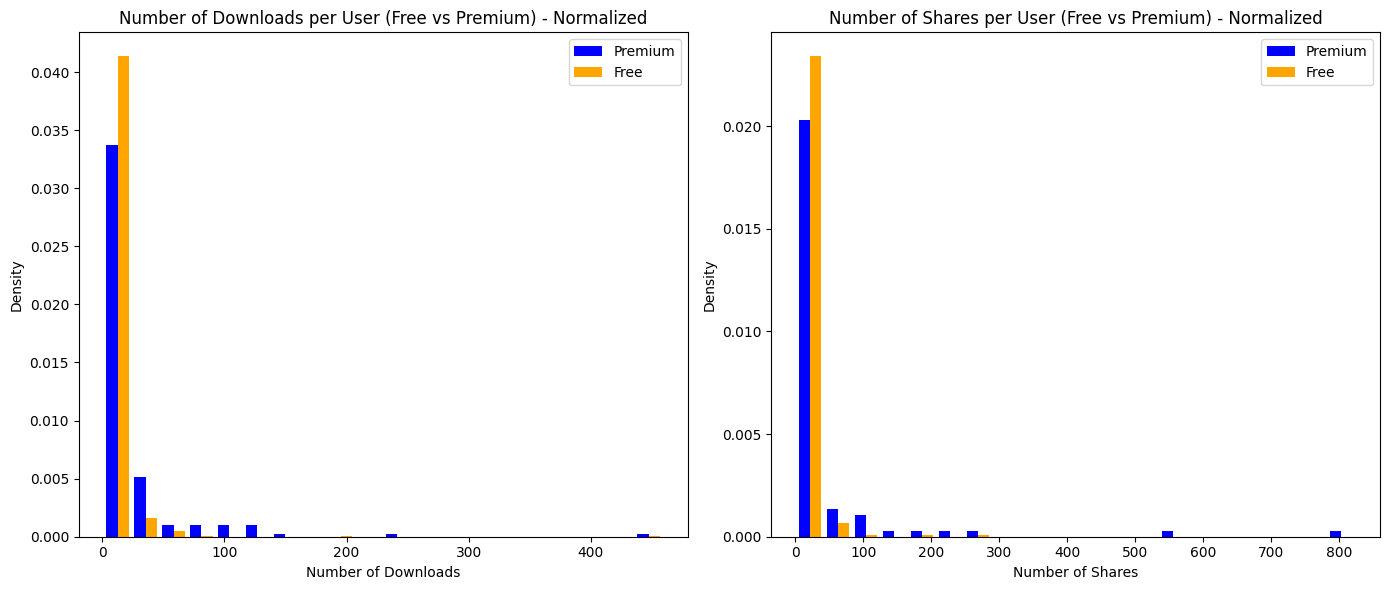

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot normalized histogram untuk Downloads
axes[0].hist([premium_downloads, free_downloads], bins=20, label=['Premium', 'Free'], color=['blue', 'orange'], density=True)
axes[0].set_title('Number of Downloads per User (Free vs Premium) - Normalized')
axes[0].set_xlabel('Number of Downloads')
axes[0].set_ylabel('Density')
axes[0].legend()

# Plot normalized histogram untuk Shares
axes[1].hist([premium_shares, free_shares], bins=20, label=['Premium', 'Free'], color=['blue', 'orange'], density=True)
axes[1].set_title('Number of Shares per User (Free vs Premium) - Normalized')
axes[1].set_xlabel('Number of Shares')
axes[1].set_ylabel('Density')
axes[1].legend()

# Menyusun layout dengan rapat
plt.tight_layout()
plt.show()


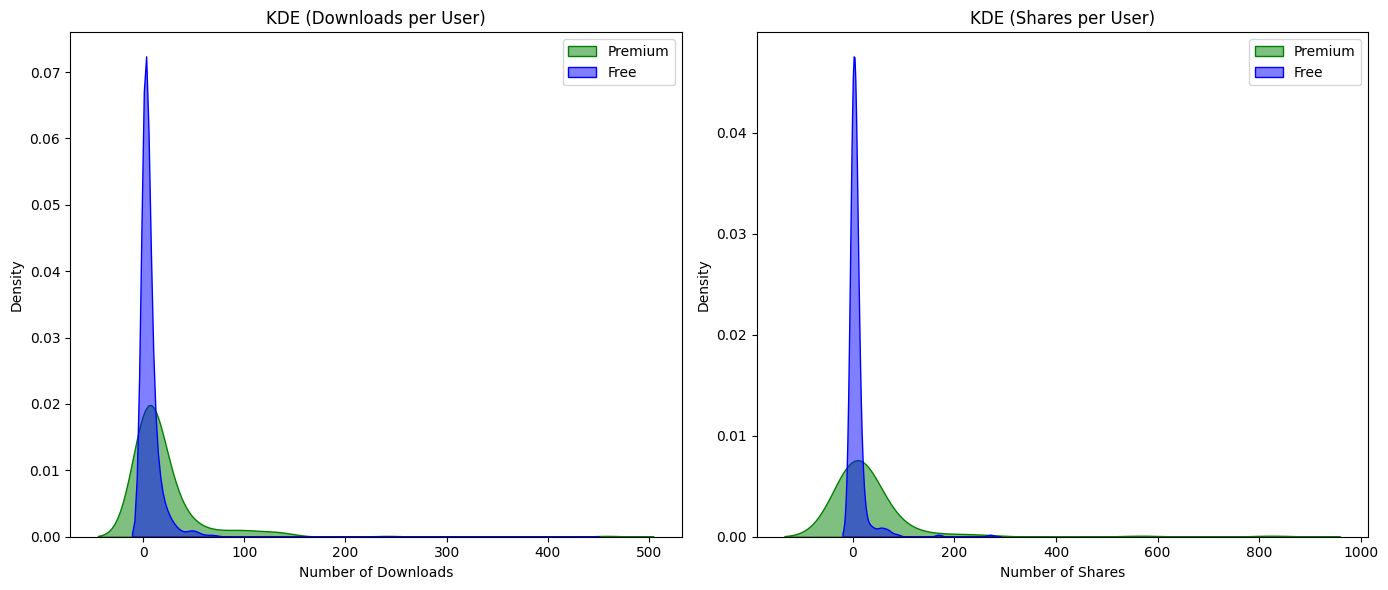

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# KDE plot for Downloads
sns.kdeplot(premium_downloads, label='Premium', color='green', fill=True, alpha=0.5, ax=axes[0])
sns.kdeplot(free_downloads, label='Free', color='blue', fill=True, alpha=0.5, ax=axes[0])
axes[0].set_title('KDE (Downloads per User)')
axes[0].set_xlabel('Number of Downloads')
axes[0].set_ylabel('Density')
axes[0].legend()

# KDE plot for Shares
sns.kdeplot(premium_shares, label='Premium', color='green', fill=True, alpha=0.5, ax=axes[1])
sns.kdeplot(free_shares, label='Free', color='blue', fill=True, alpha=0.5, ax=axes[1])
axes[1].set_title('KDE (Shares per User)')
axes[1].set_xlabel('Number of Shares')
axes[1].set_ylabel('Density')
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


<ipython-input-56-de2be9576f19>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([premium_downloads, free_downloads], labels=['Premium', 'Free'], patch_artist=True,
<ipython-input-56-de2be9576f19>:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([premium_shares, free_shares], labels=['Premium', 'Free'], patch_artist=True,


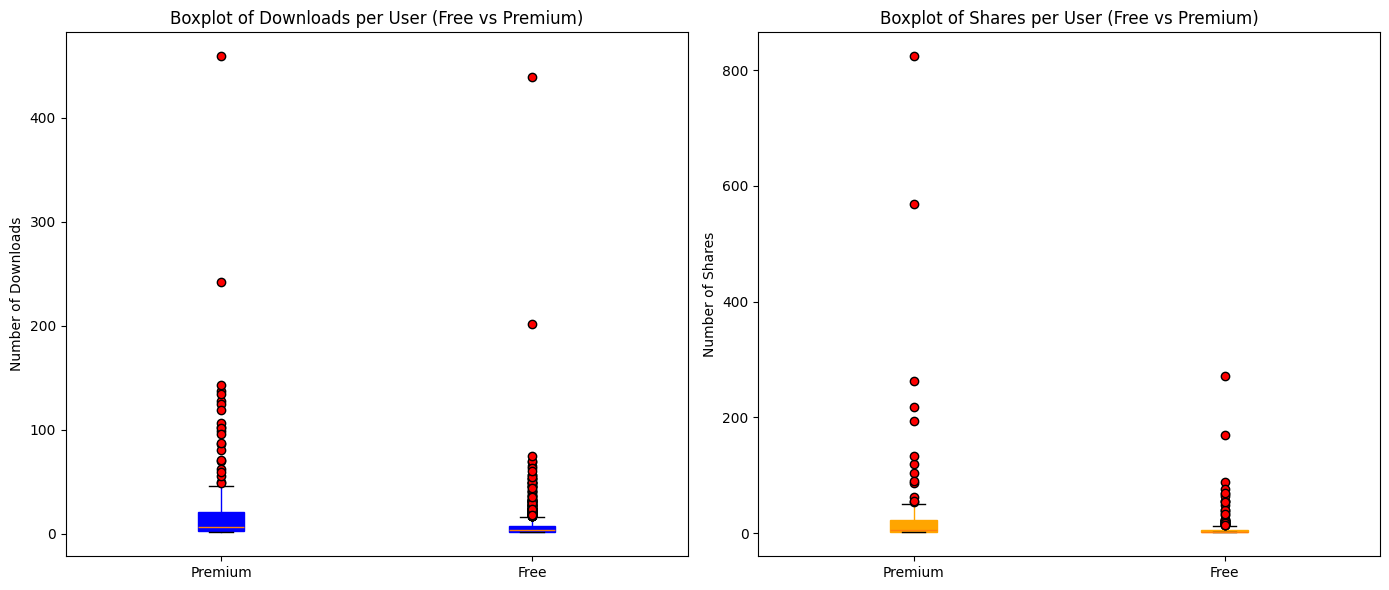

In [56]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for Downloads
axes[0].boxplot([premium_downloads, free_downloads], labels=['Premium', 'Free'], patch_artist=True,
                boxprops=dict(facecolor='blue', color='blue'),
                whiskerprops=dict(color='blue'),
                flierprops=dict(markerfacecolor='red', marker='o'))
axes[0].set_title('Boxplot of Downloads per User (Free vs Premium)')
axes[0].set_ylabel('Number of Downloads')

# Boxplot for Shares
axes[1].boxplot([premium_shares, free_shares], labels=['Premium', 'Free'], patch_artist=True,
                boxprops=dict(facecolor='orange', color='orange'),
                whiskerprops=dict(color='orange'),
                flierprops=dict(markerfacecolor='red', marker='o'))
axes[1].set_title('Boxplot of Shares per User (Free vs Premium)')
axes[1].set_ylabel('Number of Shares')


plt.tight_layout()
plt.show()


### average duration of gamesessions

In [57]:
# Calculate average and total duration of gamesessions
avg_premium_duration = premium_gamesessions['duration'].mean()
avg_free_duration = free_gamesessions['duration'].mean()

total_premium_duration = premium_gamesessions['duration'].sum()
total_free_duration = free_gamesessions['duration'].sum()

# Create summary table
import pandas as pd

gamesessions_summary = pd.DataFrame({
    'Category': ['Premium', 'Free'],
    'Avg Duration (seconds)': [avg_premium_duration, avg_free_duration],
    'Total Duration (seconds)': [total_premium_duration, total_free_duration],
    'Total Gamesessions': [len(premium_gamesessions), len(free_gamesessions)]
})

# Display the summary table
gamesessions_summary


,Category,Avg Duration (seconds),Total Duration (seconds),Total Gamesessions
0,Premium,1.050649e+07,95104777495,9052
1,Free,6.959962e+06,198344986224,28498


In [58]:
# Calculate average duration of clips for Premium and Free users
avg_premium_clips_duration = premium_clips['duration'].mean()
avg_free_clips_duration = free_clips['duration'].mean()

# Calculate total duration of clips for Premium and Free users
total_premium_clips_duration = premium_clips['duration'].sum()
total_free_clips_duration = free_clips['duration'].sum()

# Create a summary table
import pandas as pd

clips_summary = pd.DataFrame({
    'Category': ['Premium', 'Free'],
    'Avg Clips Duration': [avg_premium_clips_duration, avg_free_clips_duration],
    'Total Clips Duration': [total_premium_clips_duration, total_free_clips_duration],
    'Total Clips Count': [len(premium_clips), len(free_clips)]
})

# Display the summary table
clips_summary

,Category,Avg Clips Duration,Total Clips Duration,Total Clips Count
0,Premium,48.369379,8916895,184350
1,Free,62.102512,21482563,345921


In [59]:
# Average duration for gamesessions
avg_premium_gamesession_duration = premium_gamesessions['duration'].mean()
avg_free_gamesession_duration = free_gamesessions['duration'].mean()

# Average duration for clips
avg_premium_clips_duration = premium_clips['duration'].mean()
avg_free_clips_duration = free_clips['duration'].mean()

# Average duration for downloads
avg_premium_downloads_duration = premium_downloads.mean()
avg_free_downloads_duration = free_downloads.mean()

# Average duration for shares
avg_premium_shares_duration = premium_shares.mean()
avg_free_shares_duration = free_shares.mean()

# Summary table
average_duration_summary = pd.DataFrame({
    'Category': ['Premium', 'Free'],
    'Avg Gamesession Duration': [avg_premium_gamesession_duration, avg_free_gamesession_duration],
    'Avg Clips Duration': [avg_premium_clips_duration, avg_free_clips_duration],
    'Avg Downloads Duration': [avg_premium_downloads_duration, avg_free_downloads_duration],
    'Avg Shares Duration': [avg_premium_shares_duration, avg_free_shares_duration],
})

# Display the summary table
average_duration_summary


,Category,Avg Gamesession Duration,Avg Clips Duration,Avg Downloads Duration,Avg Shares Duration
0,Premium,1.050649e+07,48.369379,21.265403,37.791209
1,Free,6.959962e+06,62.102512,6.798874,7.889632


In [60]:
premium_clip_types = premium_clips['clip_type_id'].value_counts()
free_clip_types = free_clips['clip_type_id'].value_counts()



In [61]:
print("Premium Clip Types Distribution:")
premium_clip_types



Premium Clip Types Distribution:


,count
clip_type_id,
1,181012
5,3197
8,141


In [62]:
print("\nFree Clip Types Distribution:")
free_clip_types


Free Clip Types Distribution:


,count
clip_type_id,
1,332863
5,8067
8,4990
-1,1


In [63]:
# Ganti -1 dengan 0 (atau nilai lain yang sesuai)
free_clips['clip_type_id'] = free_clips['clip_type_id'].replace(-1, 1)


<ipython-input-63-ed4d29e2644c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  free_clips['clip_type_id'] = free_clips['clip_type_id'].replace(-1, 1)


In [64]:
premium_clip_types = premium_clips['clip_type_id'].value_counts()
free_clip_types = free_clips['clip_type_id'].value_counts()

print("\nFree Clip Types Distribution:")
free_clip_types


Free Clip Types Distribution:


,count
clip_type_id,
1,332864
5,8067
8,4990


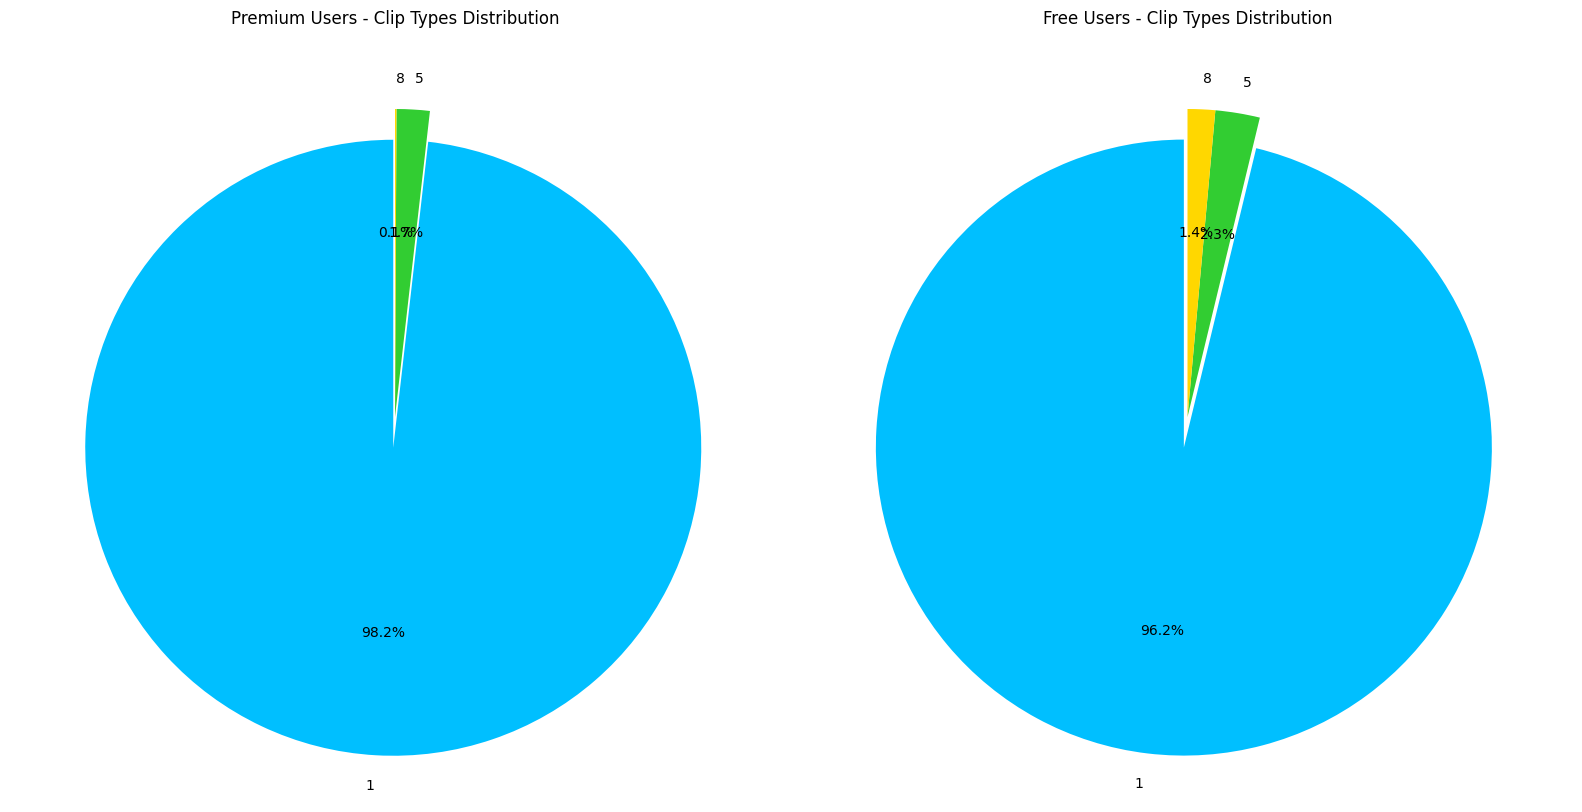

In [65]:
# Hitung distribusi klip untuk Premium dan Free
premium_clip_types = premium_clips['clip_type_id'].value_counts().sort_index()
free_clip_types = free_clips['clip_type_id'].value_counts().sort_index()

# Pastikan kategori klip konsisten antara Premium dan Free
clip_types = sorted(set(premium_clip_types.index).union(free_clip_types.index))

# Susun data untuk pie chart
premium_clip_counts = [premium_clip_types.get(clip_type, 0) for clip_type in clip_types]
free_clip_counts = [free_clip_types.get(clip_type, 0) for clip_type in clip_types]

# Labels untuk setiap kategori klip
labels = [f"{clip_type}" for clip_type in clip_types]
colors = ['#00BFFF', '#32CD32', '#FFD700']
# Membuat subplot pie chart
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart untuk Premium users
axes[0].pie(premium_clip_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors,  explode=(0.1, 0, 0), labeldistance=1.1)
axes[0].set_title('Premium Users - Clip Types Distribution')

# Pie chart untuk Free users
axes[1].pie(free_clip_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.1, 0, 0), labeldistance=1.1)
axes[1].set_title('Free Users - Clip Types Distribution')

# Menambahkan layout agar lebih rapi
plt.tight_layout()
plt.show()


## Data Analysis: Strategic Focus: **Game Recommendations for Growth**


In [66]:
gamesessions_filtered = gamesessions[gamesessions['game_name'] != 'Other Games']
game_sessions = gamesessions_filtered.groupby('game_name').size()
premium_game_sessions = gamesessions[gamesessions['user_id'].isin(premium_user_ids)].groupby('game_name').size()
free_game_sessions = gamesessions[gamesessions['user_id'].isin(free_user_ids)].groupby('game_name').size()


In [67]:
game_sessions_df = pd.DataFrame({
    'Game Name': game_sessions.index,
    'Total Sessions': game_sessions,
    'Premium Sessions': premium_game_sessions.reindex(game_sessions.index, fill_value=0),
    'Free Sessions': free_game_sessions.reindex(game_sessions.index, fill_value=0)
}).fillna(0)

game_sessions_df['Premium Percentage'] = (game_sessions_df['Premium Sessions'] / game_sessions_df['Total Sessions']) * 100
game_sessions_df['Free Percentage'] = (game_sessions_df['Free Sessions'] / game_sessions_df['Total Sessions']) * 100

# Reset index agar 'Game Name' tidak menjadi index lagi
game_sessions_df = game_sessions_df.reset_index(drop=True)

# Mengurutkan berdasarkan Total Sessions
sorted_game_sessions_df = game_sessions_df.sort_values(by='Total Sessions', ascending=False)

# Menampilkan DataFrame yang telah diubah
sorted_game_sessions_df.head(10)


,Game Name,Total Sessions,Premium Sessions,Free Sessions,Premium Percentage,Free Percentage
6,COD: Warzone3-2 & MW3-2,7929,2274,5655,28.679531,71.320469
16,Fortnite,3908,695,3213,17.784033,82.215967
52,Valorant,2436,459,1977,18.842365,81.157635
1,Apex Legends,2000,587,1413,29.350000,70.650000
24,League of Legends,1019,380,639,37.291462,62.708538
35,Overwatch 2,924,211,713,22.835498,77.164502
40,Podcast,757,22,735,2.906209,97.093791
51,Tom Clancy's Rainbow Six: Siege,643,211,432,32.814930,67.185070
43,Rocket League,524,224,300,42.748092,57.251908
32,NBA: 2K24,378,58,320,15.343915,84.656085


In [68]:
# Filter data untuk menghapus "Other Games"
downloaded_filtered = downloaded_clips[downloaded_clips['game_name'] != 'Other Games']

# Mengelompokkan berdasarkan game_name
downloaded_sessions = downloaded_filtered.groupby('game_name').size()
premium_downloaded_sessions = downloaded_filtered[downloaded_filtered['user_Id'].isin(premium_user_ids)].groupby('game_name').size()
free_downloaded_sessions = downloaded_filtered[downloaded_filtered['user_Id'].isin(free_user_ids)].groupby('game_name').size()

# Membuat DataFrame
downloaded_sessions_df = pd.DataFrame({
    'Game Name': downloaded_sessions.index,
    'Total Downloads': downloaded_sessions,
    'Premium Downloads': premium_downloaded_sessions.reindex(downloaded_sessions.index, fill_value=0),
    'Free Downloads': free_downloaded_sessions.reindex(downloaded_sessions.index, fill_value=0)
}).fillna(0)

# Menambahkan persentase Premium dan Free
downloaded_sessions_df['Premium Percentage'] = (downloaded_sessions_df['Premium Downloads'] / downloaded_sessions_df['Total Downloads']) * 100
downloaded_sessions_df['Free Percentage'] = (downloaded_sessions_df['Free Downloads'] / downloaded_sessions_df['Total Downloads']) * 100

# Reset index agar 'Game Name' tidak menjadi index lagi
downloaded_sessions_df = downloaded_sessions_df.reset_index(drop=True)

# Mengurutkan berdasarkan Total Downloads
sorted_downloaded_sessions_df = downloaded_sessions_df.sort_values(by='Total Downloads', ascending=False)

# Menampilkan DataFrame yang telah diubah
sorted_downloaded_sessions_df.head(10)


,Game Name,Total Downloads,Premium Downloads,Free Downloads,Premium Percentage,Free Percentage
3,COD: Warzone3-2 & MW3-2,3355,1208,2147,36.005961,63.994039
12,Fortnite,2000,814,1186,40.700000,59.300000
37,Valorant,1553,447,1106,28.783001,71.216999
29,Podcast,737,40,697,5.427408,94.572592
0,Apex Legends,713,200,513,28.050491,71.949509
25,Overwatch 2,503,391,112,77.733598,22.266402
36,Tom Clancy's Rainbow Six: Siege,403,154,249,38.213400,61.786600
17,League of Legends,321,98,223,30.529595,69.470405
31,Rocket League,91,5,86,5.494505,94.505495
23,NBA: 2K24,77,1,76,1.298701,98.701299


In [76]:
# Filter data untuk menghapus "Other Games"
shared_filtered = shared_clips[shared_clips['game_name'] != 'Other Games']

# Mengelompokkan berdasarkan game_name
shared_sessions = shared_filtered.groupby('game_name').size()
premium_shared_sessions = shared_filtered[shared_filtered['user_id'].isin(premium_user_ids)].groupby('game_name').size()
free_shared_sessions = shared_filtered[shared_filtered['user_id'].isin(free_user_ids)].groupby('game_name').size()

# Membuat DataFrame
shared_sessions_df = pd.DataFrame({
    'Game Name': shared_sessions.index,
    'Total Shares': shared_sessions,
    'Premium Shares': premium_shared_sessions.reindex(shared_sessions.index, fill_value=0),
    'Free Shares': free_shared_sessions.reindex(shared_sessions.index, fill_value=0)
}).fillna(0)

# Menambahkan persentase Premium dan Free
shared_sessions_df['Premium Percentage'] = (shared_sessions_df['Premium Shares'] / shared_sessions_df['Total Shares']) * 100
shared_sessions_df['Free Percentage'] = (shared_sessions_df['Free Shares'] / shared_sessions_df['Total Shares']) * 100

# Reset index agar 'Game Name' tidak menjadi index lagi
shared_sessions_df = shared_sessions_df.reset_index(drop=True)

# Mengurutkan berdasarkan Total Shares
sorted_shared_sessions_df = shared_sessions_df.sort_values(by='Total Shares', ascending=False)

# Menampilkan DataFrame yang telah diubah
sorted_shared_sessions_df.head(10)


,Game Name,Total Shares,Premium Shares,Free Shares,Premium Percentage,Free Percentage
11,Fortnite,1371,808,563,58.935084,41.064916
4,COD: Warzone3-2 & MW3-2,885,508,377,57.401130,42.598870
6,Dead by Daylight,549,533,16,97.085610,2.914390
30,Valorant,442,229,213,51.809955,48.190045
1,Apex Legends,367,217,150,59.128065,40.871935
15,League of Legends,293,227,66,77.474403,22.525597
24,Podcast,124,0,124,0.000000,100.000000
31,chatting,76,28,48,36.842105,63.157895
10,Farlight84,35,34,1,97.142857,2.857143
20,Overwatch 2,29,10,19,34.482759,65.517241


In [70]:
# Average game duration for each game
avg_game_duration = gamesessions.groupby('game_name')['duration'].mean()

# Average game duration for premium and free users
premium_avg_duration = gamesessions[gamesessions['user_id'].isin(premium_user_ids)].groupby('game_name')['duration'].mean()
free_avg_duration = gamesessions[gamesessions['user_id'].isin(free_user_ids)].groupby('game_name')['duration'].mean()

# Merging average durations into one table
duration_df = pd.DataFrame({
    'Game Name': avg_game_duration.index,
    'Average Duration (Total)': avg_game_duration,
    'Average Duration (Premium)': premium_avg_duration,
    'Average Duration (Free)': free_avg_duration
}).fillna(0)
duration_df = duration_df.reset_index(drop=True)

sorted_duration_df = duration_df.sort_values(by='Average Duration (Total)', ascending=False)
sorted_duration_df

,Game Name,Average Duration (Total),Average Duration (Premium),Average Duration (Free)
23,Honkai: Star Rail,1.690532e+07,1.909447e+07,8.696000e+06
22,Hearthstone,1.392917e+07,1.568820e+07,5.134000e+06
17,Forza Motorsport,1.341267e+07,1.341267e+07,0.000000e+00
46,SMITE,1.299379e+07,1.635657e+07,9.631000e+06
48,SuperSmash Bros Ultimate,1.280867e+07,1.422600e+07,9.974000e+06
14,Farlight84,1.197080e+07,1.611279e+07,7.947142e+06
26,MLB The Show 22&23,1.187650e+07,6.733000e+06,1.702000e+07
50,Team Fight Tatics,1.123417e+07,1.174275e+07,1.021700e+07
8,Counter Strike2,1.070265e+07,1.522922e+07,8.253342e+06
21,Halo Infinite,1.046245e+07,1.118483e+07,9.258472e+06


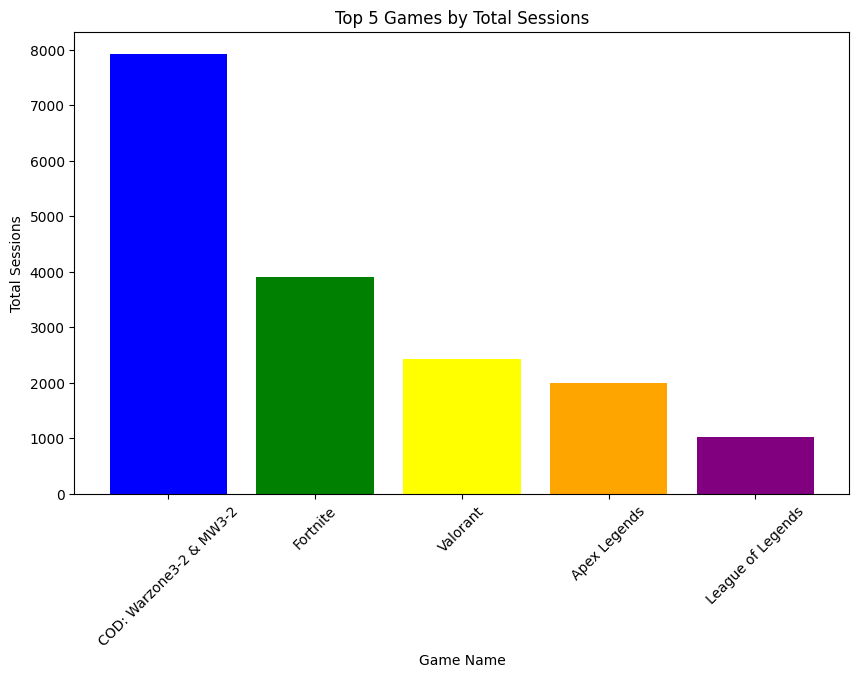

In [71]:
top_5_games = sorted_game_sessions_df.head(5)
plt.figure(figsize=(10, 6))
plt.bar(top_5_games['Game Name'], top_5_games['Total Sessions'], color=['blue', 'green', 'yellow', 'orange', 'purple'])
plt.title('Top 5 Games by Total Sessions')
plt.xlabel('Game Name')
plt.ylabel('Total Sessions')
plt.xticks(rotation=45)
plt.show()

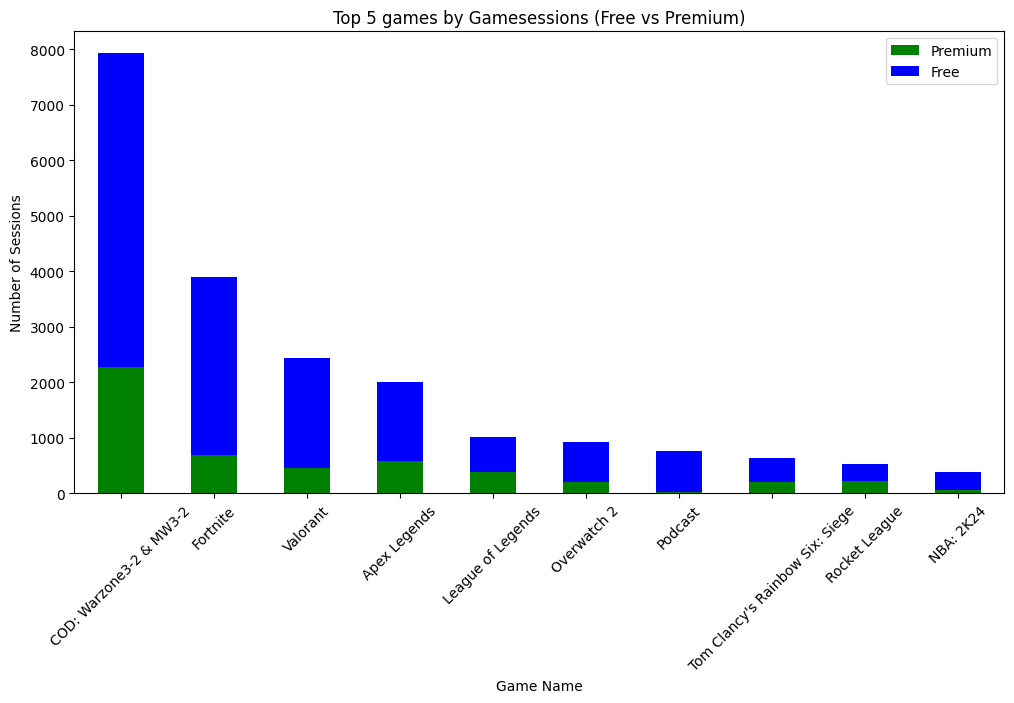

In [77]:
top_5_games = game_sessions_df.sort_values(by='Total Sessions', ascending=False).head(10)


plt.figure(figsize=(12, 6))
top_5_games[['Premium Sessions', 'Free Sessions']].plot(kind='bar', stacked=True, color=['green', 'blue'], ax=plt.gca())


plt.title('Top 5 games by Gamesessions (Free vs Premium)')
plt.xlabel('Game Name')
plt.ylabel('Number of Sessions')


plt.xticks(ticks=range(len(top_5_games)), labels=top_5_games['Game Name'], rotation=45)

plt.legend(['Premium', 'Free'])

plt.show()

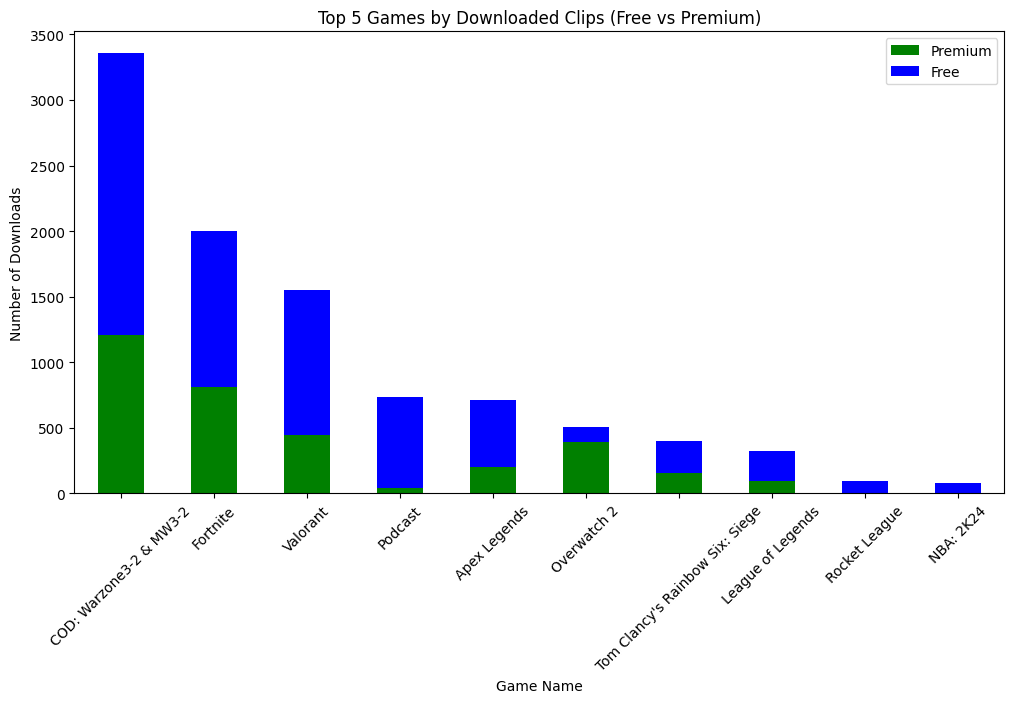

In [78]:
# Menyaring hanya top 5 game berdasarkan Total Downloads
top_5_downloaded = downloaded_sessions_df.sort_values(by='Total Downloads', ascending=False).head(10)

# Plotting jumlah download untuk masing-masing game (hanya top 5)
plt.figure(figsize=(12, 6))
top_5_downloaded[['Premium Downloads', 'Free Downloads']].plot(kind='bar', stacked=True, color=['green', 'blue'], ax=plt.gca())

# Menambahkan judul dan label
plt.title('Top 5 Games by Downloaded Clips (Free vs Premium)')
plt.xlabel('Game Name')
plt.ylabel('Number of Downloads')

# Mengatur label x-axis untuk menampilkan nama game
plt.xticks(ticks=range(len(top_5_downloaded)), labels=top_5_downloaded['Game Name'], rotation=45)

# Menambahkan legenda
plt.legend(['Premium', 'Free'])

# Menampilkan plot
plt.show()


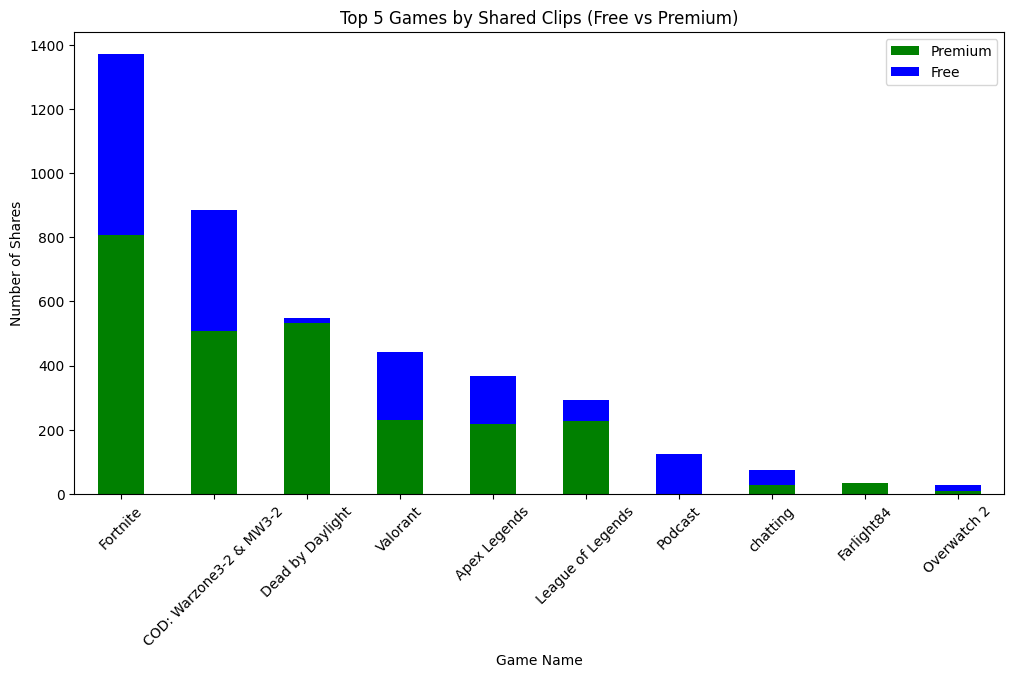

In [79]:
# Menyaring hanya top 5 game berdasarkan Total Shares
top_5_shared = shared_sessions_df.sort_values(by='Total Shares', ascending=False).head(10)

# Plotting jumlah share untuk masing-masing game (hanya top 5)
plt.figure(figsize=(12, 6))
top_5_shared[['Premium Shares', 'Free Shares']].plot(kind='bar', stacked=True, color=['green', 'blue'], ax=plt.gca())

# Menambahkan judul dan label
plt.title('Top 5 Games by Shared Clips (Free vs Premium)')
plt.xlabel('Game Name')
plt.ylabel('Number of Shares')

# Mengatur label x-axis untuk menampilkan nama game
plt.xticks(ticks=range(len(top_5_shared)), labels=top_5_shared['Game Name'], rotation=45)

# Menambahkan legenda
plt.legend(['Premium', 'Free'])

# Menampilkan plot
plt.show()


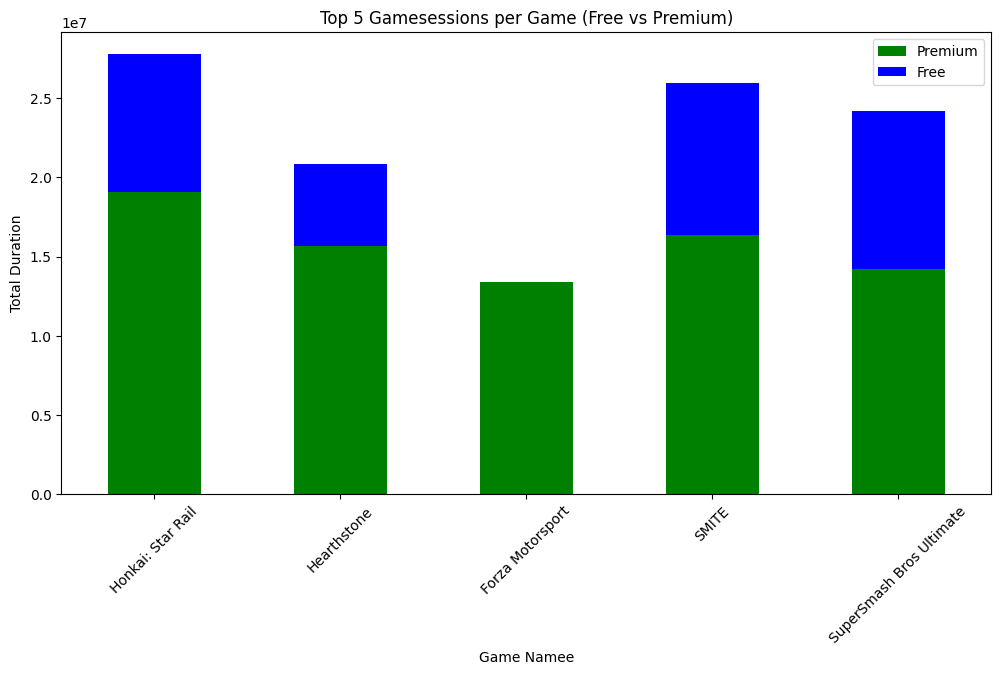

In [75]:
# Menyaring hanya top 5 game berdasarkan Total Sessions
top_5_games_duration = duration_df.sort_values(by='Average Duration (Total)', ascending=False).head(5)

# Plotting jumlah sesi untuk masing-masing game (hanya top 5)
plt.figure(figsize=(12, 6))
top_5_games_duration[['Average Duration (Premium)', 'Average Duration (Free)']].plot(kind='bar', stacked=True, color=['green', 'blue'], ax=plt.gca())

# Menambahkan judul dan label
plt.title('Top 5 Gamesessions per Game (Free vs Premium)')
plt.xlabel('Game Namee')
plt.ylabel('Total Duration')

# Mengatur label x-axis untuk menampilkan nama game
plt.xticks(ticks=range(len(top_5_games_duration)), labels=top_5_games_duration['Game Name'], rotation=45)

# Menambahkan legenda
plt.legend(['Premium', 'Free'])

# Menampilkan plot
plt.show()